In [1]:
import json
import pandas as pd

In [2]:
# Load original graph data (with binding energies)
with open('graph_data_original.json', 'r') as f:
    original_graphs = json.load(f)
    
# Load lookup table
lookup_df = pd.read_csv("lookup.csv")
atom_dict = {row['Element']: row['Z'] for _, row in lookup_df.iterrows()}

In [3]:
# Load model predictions
results_df = pd.read_csv('results.csv')

In [4]:
orb_list = ['1s',
         '2s',
         '2p',
         '2p3/2',
         '3s',
         '3p',
         '3p3/2',
         '3d',
         '3d5/2',
         '4s',
         '4p3/2',
         '4d',
         '4d5/2',
         '4f7/2',
         '5s',
         '5p3/2',
         '5d5/2']

In [5]:
true_binding_energies = []
lookup_estimates = []

for mol_graph in original_graphs.values():
    for node in mol_graph['nodes']:
        atom = node['atom_type']  # or atomic_number if needed
        orbitals = node['orbitals']
        energies = node['binding_energies']
        
        for orbital, true_energy in zip(orbitals, energies):
            true_binding_energies.append(true_energy)
            if orbital!=-1:
                lookup_energy = float(lookup_df.loc[atom_dict[atom]-1, orbital])
            else:
                lookup_energe = -1
            if lookup_energy is None:
                lookup_energy = 0.0
            lookup_estimates.append(lookup_energy)

In [7]:
len(true_binding_energies)

7332

In [8]:
len(lookup_estimates)

7332

In [9]:
# Truncate the true list to match number of predictions
true_binding_energies = true_binding_energies[:len(results_df)]
lookup_energies = lookup_estimates[:len(results_df)]

In [10]:
# Add to dataframe
results_df['True Binding Energy'] = true_binding_energies
results_df['Lookup Energy'] = lookup_energies
#results_df['Absolute Error'] = (results_df['Binding Energy'] - results_df['True Binding Energy']).abs()

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
results_df

,Molecule,Atom,Orbital,Binding Energy,True Binding Energy,Lookup Energy
0,[Ag],Ag,3d5/2,378.965583,375.550,368.3
1,C/C(=C\C(=O)C(F)(F)F)/O[Al](O/C(=C\C(=O)C(F)(F...,C,1s,293.233103,293.250,284.2
2,C/C(=C\C(=O)C(F)(F)F)/O[Al](O/C(=C\C(=O)C(F)(F...,C,1s,293.173124,293.250,284.2
3,C/C(=C\C(=O)C(F)(F)F)/O[Al](O/C(=C\C(=O)C(F)(F...,C,1s,292.566679,293.250,284.2
4,C/C(=C\C(=O)C(F)(F)F)/O[Al](O/C(=C\C(=O)C(F)(F...,C,1s,292.818245,293.250,284.2
...,...,...,...,...,...,...
129,CC(/C(=C/C(=O)C(C)(C)C)/O[Al](O/C(=C\C(=O)C(C)...,C,1s,289.119014,290.585,284.2
130,CC(/C(=C/C(=O)C(C)(C)C)/O[Al](O/C(=C\C(=O)C(C)...,C,1s,288.475682,290.585,284.2
131,CC(/C(=C/C(=O)C(C)(C)C)/O[Al](O/C(=C\C(=O)C(C)...,C,1s,287.937591,290.585,284.2
132,CC(/C(=C/C(=O)C(C)(C)C)/O[Al](O/C(=C\C(=O)C(C)...,C,1s,287.482183,290.585,284.2


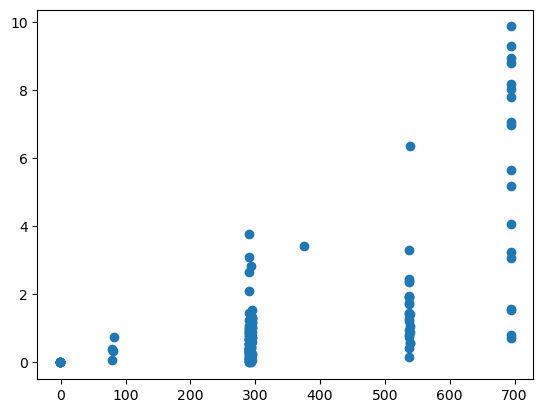

In [17]:
plt.scatter(results_df['True Binding Energy'], np.abs(results_df['Binding Energy']-results_df['True Binding Energy']))

In [18]:
np.mean(np.abs(results_df['Binding Energy']-results_df['True Binding Energy']))

1.5010141691758236

In [19]:
np.mean(np.abs(results_df['Lookup Energy']-results_df['True Binding Energy']))

25.2222014925374